**Sentiment Analysis** is a text mining and natural language processing (NLP) application for detecting and classifying emotional expressions in text data.
Sentiment Analysis is the process of extracting emotional meanings from text data. In this process, the aim is to divide the texts into emotional categories such as positive, negative or neutral.

Some basic algorithms used when performing sentiment analysis are:

1. Naive Bayes  
2. Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [ ]:
splits = {'train': 'training_data.csv', 'validation': 'validation_data.csv', 'test': 'test_data.csv'}
df = pd.read_csv("hf://datasets/sudhanshusinghaiml/airlines-sentiment-analysis/" + splits["train"])

In [ ]:
df.head()

,text,label
0,"“@JetBlue: @sylvie75015 Good morning, Sylvie! ...",1
1,@USAirways but need to confirm please help,0
2,"@united no, I had to leave for work. Would hav...",0
3,"@united Bad coffee, but the juice is ok. #GetP...",-1
4,@united I have a flight from omaha to chicago ...,-1


**Adding a new column**

In [ ]:
df['sentiment']= df['label'].apply(lambda x:'negative' if x==-1 else('neutral' if x==0 else 'positive'))
df.head()

,text,label,sentiment
0,"“@JetBlue: @sylvie75015 Good morning, Sylvie! ...",1,positive
1,@USAirways but need to confirm please help,0,neutral
2,"@united no, I had to leave for work. Would hav...",0,neutral
3,"@united Bad coffee, but the juice is ok. #GetP...",-1,negative
4,@united I have a flight from omaha to chicago ...,-1,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       7905 non-null   object
 1   label      7905 non-null   int64 
 2   sentiment  7905 non-null   object
dtypes: int64(1), object(2)
memory usage: 185.4+ KB


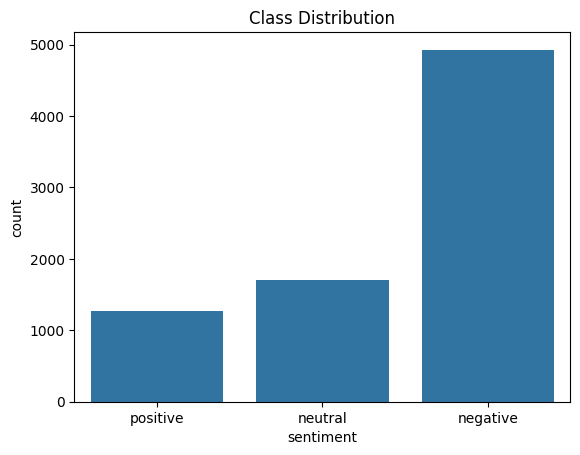

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.show()

**Model Training**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
train_df = pd.read_csv("hf://datasets/sudhanshusinghaiml/airlines-sentiment-analysis/" + splits["train"])
validation_df = pd.read_csv("hf://datasets/sudhanshusinghaiml/airlines-sentiment-analysis/" + splits["validation"])
test_df = pd.read_csv("hf://datasets/sudhanshusinghaiml/airlines-sentiment-analysis/" + splits["test"])

In [ ]:
# Vectorize texts (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000) # selects the 5000 most frequently occurring words
X_train = vectorizer.fit_transform(train_df['text'])
X_val = vectorizer.transform(validation_df['text'])
X_test = vectorizer.transform(test_df['text'])

In [ ]:
y_train = train_df['label']
y_val = validation_df['label']
y_test = test_df['label']

**Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
val_predictions = model.predict(X_val)
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

          -1       0.82      0.95      0.88      3720
           0       0.67      0.51      0.58      1204
           1       0.83      0.58      0.68       932

    accuracy                           0.80      5856
   macro avg       0.77      0.68      0.71      5856
weighted avg       0.79      0.80      0.78      5856



In [ ]:
test_predictions = model.predict(X_test)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

          -1       0.80      0.93      0.86       531
           0       0.64      0.49      0.56       191
           1       0.86      0.61      0.71       157

    accuracy                           0.78       879
   macro avg       0.77      0.68      0.71       879
weighted avg       0.77      0.78      0.77       879



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_val_predictions = nb_model.predict(X_val)
print("Naive Bayes Validation Set Results:")
print(classification_report(y_val, nb_val_predictions))


Naive Bayes Validation Set Results:
              precision    recall  f1-score   support

          -1       0.70      0.99      0.82      3720
           0       0.76      0.19      0.31      1204
           1       0.91      0.24      0.38       932

    accuracy                           0.71      5856
   macro avg       0.79      0.47      0.50      5856
weighted avg       0.74      0.71      0.64      5856



In [ ]:
nb_test_predictions = nb_model.predict(X_test)
print("Naive Bayes Test Set Results:")
print(classification_report(y_test, nb_test_predictions))

Naive Bayes Test Set Results:
              precision    recall  f1-score   support

          -1       0.65      0.99      0.79       531
           0       0.76      0.15      0.25       191
           1       0.89      0.22      0.35       157

    accuracy                           0.67       879
   macro avg       0.77      0.45      0.46       879
weighted avg       0.72      0.67      0.59       879



Source:

*   https://www.kdnuggets.com/sentiment-analysis-in-python-going-beyond-bag-of-words
*  Dataset: https://huggingface.co/datasets/sudhanshusinghaiml/airlines-sentiment-analysis

